In [2]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


## Part A

•DOMAIN: Medical 

• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 

• PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms

#### Part A: Q1. Data Understanding: [5 Marks]

A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]

B. Print Shape and columns of all the 3 DataFrames. [1 Mark]

C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

D. Print DataTypes of all the 3 DataFrames. [1 Mark]

E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]


In [2]:
#Part A: Q1 A : Read all the 3 CSV files as DataFrame and store them into 3 separate variables.
Norm_df = pd.read_csv('Normal.csv')
H_df= pd.read_csv('Type_H.csv')
S_df= pd.read_csv('Type_S.csv')

In [3]:
#Part A: Q1 B : Print Shape and columns of all the 3 DataFrames.
print('The shape of Norm_df is {} and the columns are {}'. format (Norm_df.shape,Norm_df.columns.tolist()))
print('The shape of H_df is {} and the columns are {}'. format (H_df.shape,H_df.columns.tolist()))
print('The shape of S_df is {} and the columns are {}'. format (S_df.shape,S_df.columns.tolist()))

The shape of Norm_df is (100, 7) and the columns are ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
The shape of H_df is (60, 7) and the columns are ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
The shape of S_df is (150, 7) and the columns are ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


The shape of Normal_ds is 100,7 (100 rows & 7 columns) and column names are 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class'. 

The shape of Hl_df is 60,7 (60 rows & 7 columns) and column names are 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class'.

The shape of S_df is 150,7 (150 rows & 7 columns) and column names are 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class'.

In [5]:
#Part A: Q1 C : Compare Column names of all the 3 DataFrames and clearly write observations.
dataframes = [Norm_df,H_df,S_df]
if all([set(dataframes[0].columns) == set(df.columns) for df in dataframes]):  #Comparing the names  of all the dataframes
    print('All dataframes have the same columns')
else:
    print('Some dataframes have different columns')

All dataframes have the same columns


In [6]:
# checking the datatypes of the columns
for i in range(len(dataframes)):
    print(dataframes[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non

Findings:

The above results shows that all the three dataframes have same column names. \
The order of the columns is also same in all the three dataframes. \
The datatypes of the columns are also same. All are float except Class which is an object

In [7]:
#Part A: Q1 D : Print DataTypes of all the 3 DataFrames.
for i in range(len(dataframes)):
    print(dataframes[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non

The above result shows that in all the three dataframes 6 columns (P_incidence, P_tilt, L_angle, S_slope, P_radius, S_Degree) have float values whereas the target column (Class) is categorical.

In [8]:
#Part A: Q1 E : Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.
print(Norm_df['Class'].value_counts(), Norm_df['Class'].value_counts(normalize= True))
print(H_df['Class'].value_counts(), H_df['Class'].value_counts(normalize= True))
print(S_df['Class'].value_counts(), S_df['Class'].value_counts(normalize= True))

Normal    73
Nrmal     27
Name: Class, dtype: int64 Normal    0.73
Nrmal     0.27
Name: Class, dtype: float64
Type_H    37
type_h    23
Name: Class, dtype: int64 Type_H    0.616667
type_h    0.383333
Name: Class, dtype: float64
Type_S    133
tp_s       17
Name: Class, dtype: int64 Type_S    0.886667
tp_s      0.113333
Name: Class, dtype: float64


The above result shows that each of the dataframes have two categories in the 'Class' column. \
Norm_df has Normal & Nrmal where Normal contributes 73% & Nrmal is 27%. \
H_df has Type_H & type_h where Type_H contributes 61.67% & type_h contributes 38.3%. \
S_df has Type_S & tp_s where Type_S is 88.66% and tp_s is just 11.33%

#### Part A: Q2. Data Preparation and Exploration: [5 Marks]

A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks] \
    
    For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks] \
     
     Checkpoint: Expected Output shape = (310,7)

C. Print 5 random samples of this DataFrame [1 Marks]

D. Print Feature-wise percentage of Null values. [1 Mark]

E. Check 5-point summary of the new DataFrame. [1 Mark]

In [9]:
#Part A: Q2 A :  Unify all the variations in ‘Class’ feature for all the 3 DataFrames.
Norm_df = Norm_df.replace('Nrmal','Normal')
H_df = H_df.replace('Type_H','type_h')
S_df = S_df.replace(['Type_S','tp_s'],'type_s')

In [10]:
print(Norm_df['Class'].value_counts(), Norm_df['Class'].value_counts(normalize= True))
print(H_df['Class'].value_counts(), H_df['Class'].value_counts(normalize= True))
print(S_df['Class'].value_counts(), S_df['Class'].value_counts(normalize= True))

Normal    100
Name: Class, dtype: int64 Normal    1.0
Name: Class, dtype: float64
type_h    60
Name: Class, dtype: int64 type_h    1.0
Name: Class, dtype: float64
type_s    150
Name: Class, dtype: int64 type_s    1.0
Name: Class, dtype: float64


It shows Classes are bit imbalanced.

In [11]:
#Part A: Q2 B :   Combine all the 3 DataFrames to form a single DataFrame.
df= pd.concat([Norm_df,H_df,S_df],axis=0)
df.shape

(310, 7)

In [12]:
#Part A: Q2 C :  Print 5 random samples of this DataFrame.
df.sample(n = 5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
48,40.349296,10.194748,37.967747,30.154548,128.009927,0.458901,Normal
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,type_s
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
126,81.082320,21.255840,78.766756,59.826480,90.071880,49.159426,type_s
49,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,type_h


In [13]:
#Part A: Q2 D :  Print Feature-wise percentage of Null values.
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [14]:
(df.isnull().sum())/df.count()*100 #taking percent

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [15]:
#Part A: Q2 E :  Check 5-point summary of the new DataFrame.
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,type_s
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


#### Part A: Q3. Data Analysis: [10 Marks]

A. Visualize a heatmap to understand correlation between all features [2 Marks]

B. Share insights on correlation. [2 Marks]

    A. Features having stronger correlation with correlation value.

    B. Features having weaker correlation with correlation value.

C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

In [16]:
#Encoding categorical variable 'Class'
class_label_encoder = LabelEncoder()
df.iloc[:,-1] = class_label_encoder.fit_transform(df.iloc[:,-1])

In [17]:
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,1.161290
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.884852
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,2.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,2.000000


<Axes: >

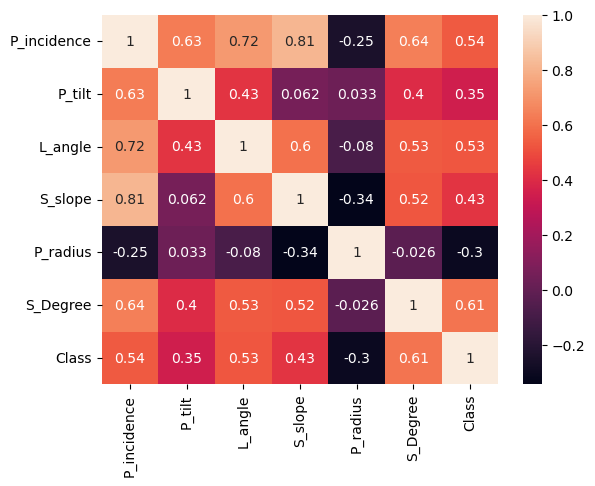

In [18]:
#Part A: Q3 A :  Visualize a heatmap to understand correlation between all features.
sns.heatmap(df.corr(),annot=True)

In [19]:
# Part A: Q3 B :  Share insights on correlation.
    #A. Features having stronger correlation with correlation value.
    #B. Features having weaker correlation with correlation value.

#### A: Features having stronger correlation with correlation value
1) S_Degree, P_incidence & L_angle is positively correlated with target variable 'Class' with correlation value of 0.61, 0.54,0.53 respectively.
2) P_incidence has higher positive correlation with S_slope, L_angle, S_degree & P_tilt with correlation value as 0.81, 0.72, 0.64 & 0.63 respectively.
3) L_angle is positively correlated with S_slope & S_degree with correlation values of 0.6 & 0.53 

#### B: Features having weaker correlation with correlation value
1) P_tilt & S_slope is mildly correlated with target variable 'Class' with 0.35 & 0.43 correlation values respectively.
2) P_radius is mildly negatively correlated with 'Class' with -0.3 as correalation value.
3) P_radius is mildly negatively correlated with S_slope with correlation values as -0.34.
4) S_Degree & P_tilt are also weakly positively correlatied having correlation value of 0.4

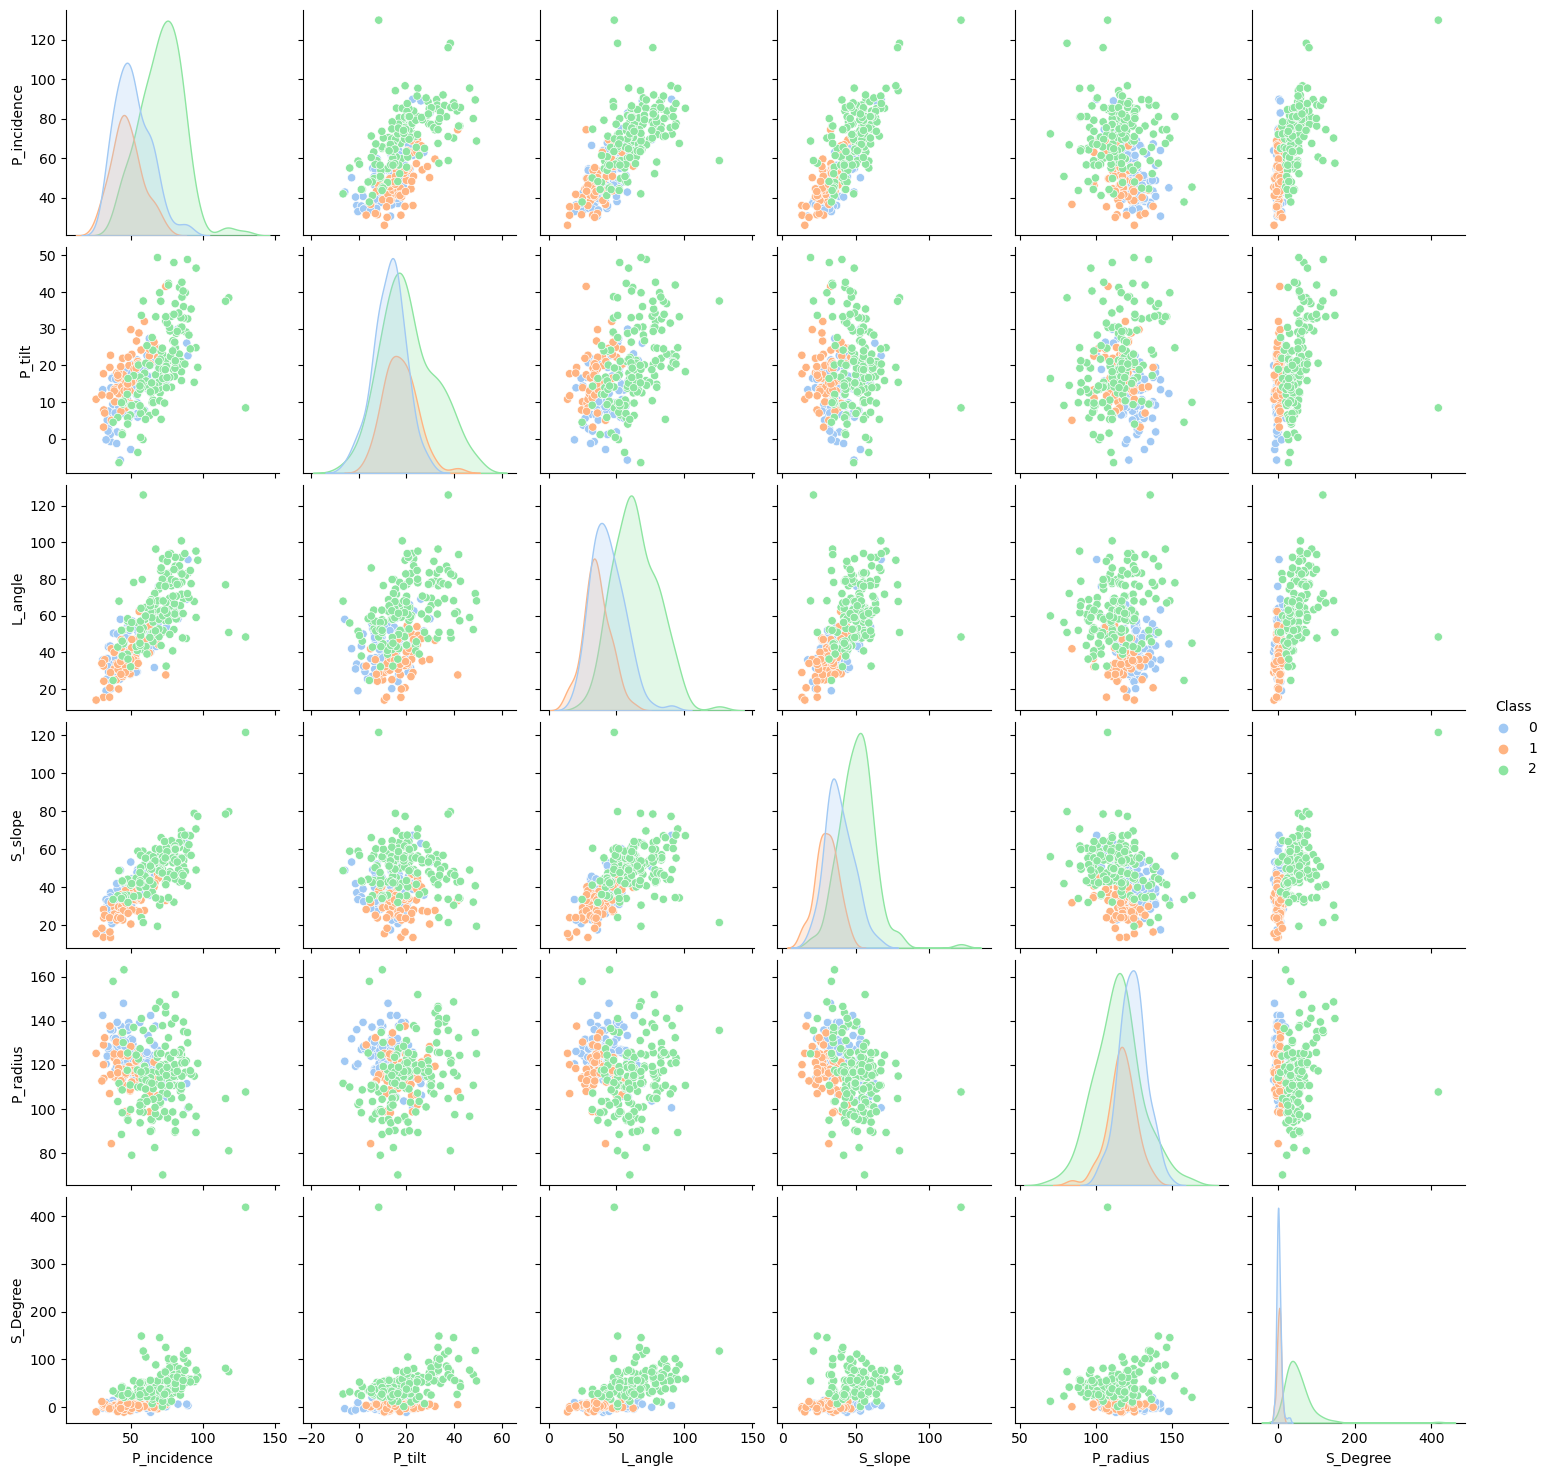

In [20]:
#Part A: Q3 C :  Visualize a pairplot with 3 classes distinguished by colors and share insights.
sns.pairplot(df,diag_kind = 'kde',hue= 'Class',palette= 'pastel')

#### Observations:
P_tilt, L_angle, S_slope, S_degree are positively correlated with P_incidence. \
P_Radius & S_Slope looks like mildly negatively correlated. \
L_angle is positively correlated with S_Slope & S_Degree. \
All the features except S_degree is slightly right skewed. \
Classes are overlapping alot and there is not much clear distinction between them. Class 2 is segregated a little better than Class 0 & 1. \
We can also notice that the data is imbalanced. Class 2 has more samples than Class 0 & 1.

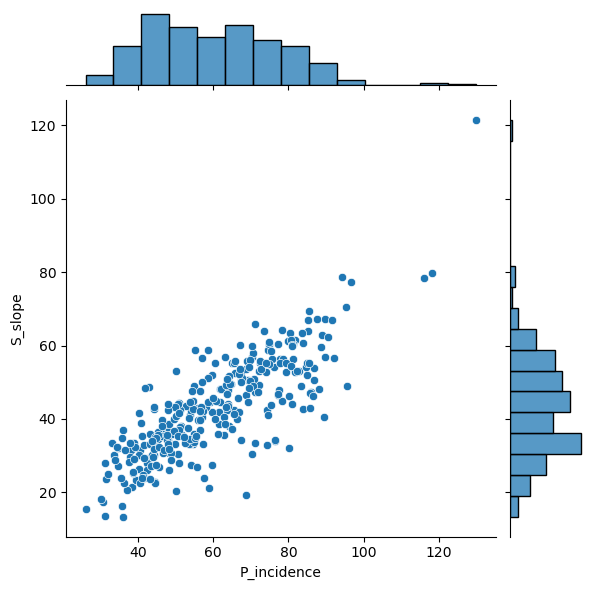

In [21]:
#Part A: Q3 D :  Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.
sns.jointplot(df,x= 'P_incidence' ,y='S_slope')

#### Observations:
1. P_incidence & S_slope are positively correlated.
2. P_incidence & S_slope are both slighly rightly skewed 

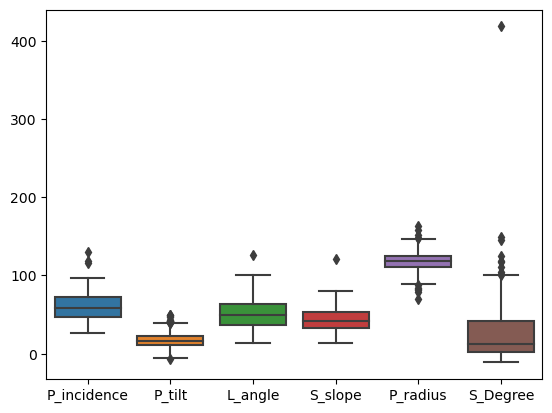

In [22]:
#Part A: Q3 E :  Visualize a boxplot to check distribution of the features and share insights.
columns = list(df)[0:-1] # Excluding Outcome column which has only 
sns.boxplot(df[columns]);

#### Observations:
1. P_incidence looks like normally distributed ( a very slightly right skewed) with median around 70 and have a few outliers above 100.
2. P_tilt is sligthly right skewed with median around 15 and have outliers both below lower limit & above upper limit.
3. L_angle & S_slope are also a little right skewed with outlier above upper limit.
4. P_radius looks normally distributed with median around 120 and have a few outliers both below lower limit & above upper limit.
5. S_degree is positivly skewed with outliers above upper limit.

#### Part A: Q4. Model Building: [6 Marks]

A. Split data into X and Y. [1 Marks]

B. Split data into train and test with 80:20 proportion. [1 Marks]

C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

D. Print all the possible performance metrics for both train and test data. [2 Marks]

In [52]:
#Part A: Q4 A :  Split data into X and Y.
X= df.drop('Class',axis=1)
Y= df['Class']

In [54]:
#Part A: Q4 B : Split data into train and test with 80:20 proportion.
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(248, 6)
(248,)
(62, 6)
(62,)


In [61]:
#Part A: Q4 C : Train a Supervised Learning Classification base model using KNN classifier.
knn_n_as_3 = KNeighborsClassifier(n_neighbors = 3)

knn_n_as_3.fit(x_train, y_train) # fitting the model

y_hat_n_as_3 = knn_n_as_3.predict(x_train)
y_pred_n_as_3 = knn_n_as_3.predict(x_test) # predict the response
y_pred_n_as_3

array([0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2])

In [62]:
#Part A: Q4 D : Print all the possible performance metrics for both train and test data.

print("The accuracy of model in training data set is : {:.2f} % ". format((accuracy_score(y_train,y_hat_n_as_3))*100))
print("The accuracy of model in test data set is : {:.2f} % ". format((accuracy_score(y_test,y_pred_n_as_3))*100))

The accuracy of model in training data set is : 91.53 % 
The accuracy of model in test data set is : 85.48 % 


<Axes: >

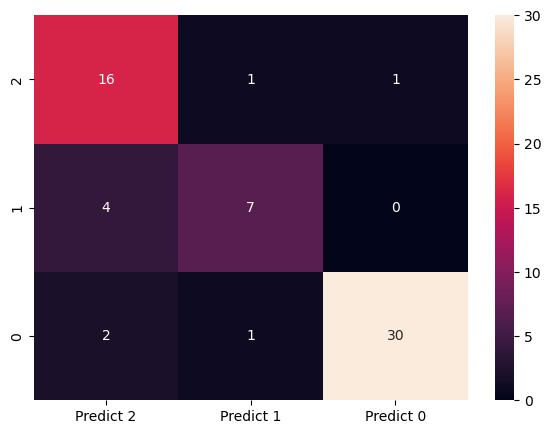

In [63]:
#calculating confusion matrix
cm=confusion_matrix(y_test, y_pred_n_as_3)

df_cm = pd.DataFrame(cm, index = [i for i in ["2","1","0"]],
                  columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [64]:
#calculating Recall, Precision & f1-score for multinomial classification
print(classification_report(y_test, y_pred_n_as_3))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.78      0.64      0.70        11
           2       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



#### Part A: Q5. Performance Improvement: [4 Marks]

A. Experiment with various parameters to improve performance of the base model. [2 Marks]

        (Optional: Experiment with various Hyperparameters - Research required)

B. Clearly showcase improvement in performance achieved. [1 Marks]

    For Example:
        A. Accuracy: +15% improvement
        B. Precision: +10% improvement.

C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

In [65]:
#Part A: Q5 A : Experiment with various parameters to improve performance of the base model.

# finding the best 'k' and calculating the accuracy of models with different values of k
accuracy_k = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    accuracy_k[i-1] = accuracy_score(y_test, yhat)

accuracy_k

array([0.90322581, 0.82258065, 0.85483871, 0.80645161, 0.83870968,
       0.82258065, 0.82258065, 0.80645161, 0.80645161, 0.77419355,
       0.79032258, 0.77419355, 0.79032258, 0.80645161, 0.79032258,
       0.82258065, 0.83870968, 0.82258065, 0.82258065, 0.82258065])

<Axes: xlabel='No. of Neighbors ', ylabel='Accuracy'>

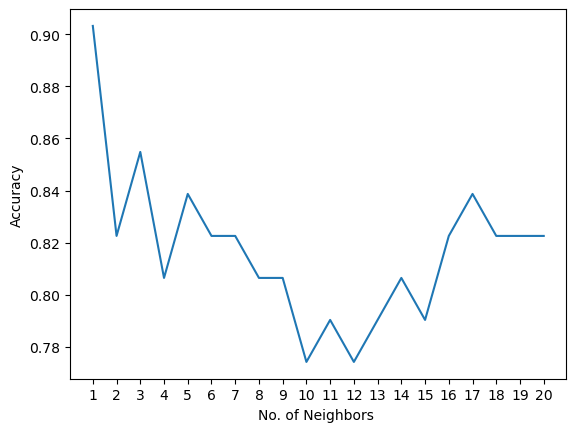

In [66]:
x_val = np.arange(1,21,step=1)
plt.xticks(x_val)
plt.xlabel('No. of Neighbors ')
plt.ylabel('Accuracy')
sns.lineplot(x= x_val, y= accuracy_k)

The above plot shows the optimal no of neighbours is 1 but it can have higher variance & lead to overfitting, hence we should try other parameters along with different values of k.

Here, I will try two approaches 
1) To fit & predict using k=1
2) Use 3 hyperparameter: n-neighbors, weights and metric and choose the best one and then train & predict. I will be using Grid Search technique for hyperparameter optimization. 

In [67]:
#Approach 1: Using K=1

knn_n_as_1 = KNeighborsClassifier(n_neighbors = 1)

knn_n_as_1.fit(x_train, y_train) # fitting the model

y_hat_n_as_1 = knn_n_as_1.predict(x_train)
y_pred_n_as_1 = knn_n_as_1.predict(x_test) # predict the response
y_pred_n_as_1

array([0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2])

In [68]:
print("The accuracy of model in training data set is : {:.2f} % ". format((accuracy_score(y_train,y_hat_n_as_1))*100))
print("The accuracy of model in test data set is : {:.2f} % ". format((accuracy_score(y_test,y_pred_n_as_1))*100))

The accuracy of model in training data set is : 100.00 % 
The accuracy of model in test data set is : 90.32 % 


<Axes: >

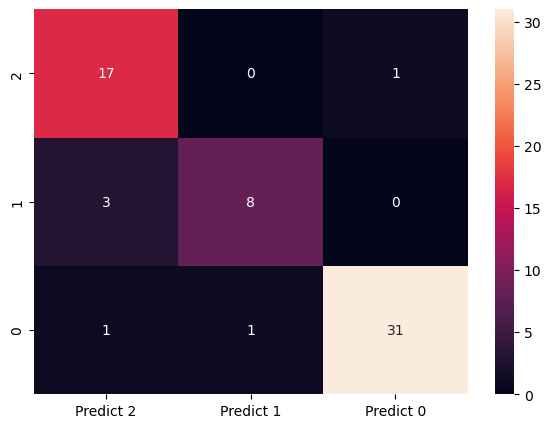

In [69]:
cm=confusion_matrix(y_test,y_pred_n_as_1)

df_cm = pd.DataFrame(cm, index = [i for i in ["2","1","0"]],
                  columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [70]:
print(classification_report(y_test, y_pred_n_as_1))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.89      0.73      0.80        11
           2       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.91      0.90      0.90        62



#### Approach 2: Using hyperparameters: n_neighbors, weights, metric
1) n_neighbors : to decide the best k based on the values we have computed above. Here, i can see the accuracy is good at neighbours 1,3,5,7 & 17. hence will try with these k values.

2) weights : to check whether adding weights to the data points is improving model performance or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.

3) metric : The distance metric ('minkowski','euclidean','manhattan')to be used to improve model performance.

 I will be using Grid Search technique for hyperparameter optimization. An exhaustive grid search takes in as many hyperparameters as I want, and tries every single possible combination of the hyperparameters as well as as many cross-validations as I want to perform. \
I will be using class validation score as 3( cv= 3). 
 
In this case with 5 values of k, 2 of weights, 3 of metrics & cv as 3, Grid Search will evaluate the model 5 x 2 x 3 x 3 = 225 times with different hyperparameters.

In [71]:
#Approach 2: Using hyperparameters:

grid_params = { 'n_neighbors' : [1,3,5,7,17],
               'weights' : ['distance','uniform'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params,cv=3)

In [72]:
# fit the model on our train set
g_res = gs.fit(x_train, y_train)

In [73]:
#get the best score
g_res.best_score_

0.826672543833872

In [74]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}

In [75]:
# use the best hyperparameters
knn_best = KNeighborsClassifier(n_neighbors = 7, weights = 'distance',metric = 'minkowski')
knn_best.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [76]:
# get prediction
y_hat_best = knn_best.predict(x_train)
y_pred_best = knn_best.predict(x_test)

In [77]:
print('Training set accuracy: ', accuracy_score(y_train, y_hat_best))
print('Test set accuracy: ',accuracy_score(y_test, y_pred_best))

Training set accuracy:  1.0
Test set accuracy:  0.8548387096774194


<Axes: >

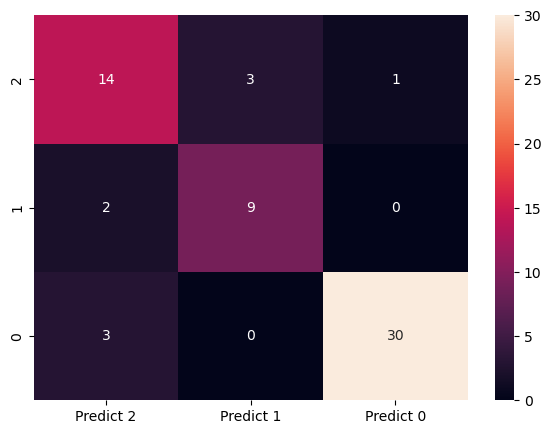

In [78]:
cm=confusion_matrix(y_test,y_pred_best)

df_cm = pd.DataFrame(cm, index = [i for i in ["2","1","0"]],
                  columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [79]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.75      0.82      0.78        11
           2       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.84      0.83        62
weighted avg       0.86      0.85      0.86        62



##### Part A: Q5 B : Clearly showcase improvement in performance achieved.
I tried two different approaches, one by just changing the no of neighbours & another by changing hyperparameters.

###### Results with just changing the K=1
    The accuracy of model in training data set is : 100.00 % , Hence accuracy increased by ~8% in training data.

    The accuracy of model in test data set is : 90.32 % , Hence accuracy increased by ~5% in test data.

    Precision: improved by 7%

    Recall:  improved by 6%

    F1 score: improved by 7%


###### Results with changing hyperparameters {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
    Training set accuracy:  1.0, Hence accuracy increased by ~8% in training data.

    Test set accuracy:  0.85, No change in accuracy in test data.

    Precision: No change

    Recall:  improved by 3%

    F1 score: improved by 2%


##### Part A: Q5 C : Clearly state which parameters contributed most to improve model performance. 

I think the driving parameter in this case is No of Neighbors. The optimal no of k can effect the performance of the model. I noticed that by just changing the K=1, the performance is better but sometimes, with just 1 neighbour model can be overfitting and can fail drastically in test data. But in this case, its working better in test data too. 

Even after changing the other parameters, I don't see any noticable change in the accuracy of test data, precision & recall rather its making the model more complex and computationally expensive.

So, in this case, changing the no of neighbours will find the best fit model.

## Part B

• DOMAIN: Banking, Marketing

• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. 

• DATA DICTIONARY:
1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

• PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

#### 1. Data Understanding and Preparation: [5 Marks]

A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]

B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

D. Change Datatype of below features to ‘Object’ [1 Marks]

    ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

    [Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]

In [3]:
#Part B: Q1 A : Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.
data1= pd.read_csv('Data1.csv')
data2= pd.read_csv('Data2.csv')
print(data1.head())
print(data2.head())

   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2  
   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0       

In [4]:
#Part B: Q1 B : Print shape and Column Names and DataTypes of both the Dataframes.
print('The shape of data1 is {} and the columns are {}'. format (data1.shape,data1.columns.tolist()))
print()
print('The shape of data2 is {} and the columns are {}'. format (data2.shape,data2.columns.tolist()))
print()
print("The data types of columns in data 1:")
print()
print(data1.info())
print()
print("The data types of columns in data 1:")
print()
print(data2.info())

The shape of data1 is (5000, 8) and the columns are ['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore', 'MonthlyAverageSpend', 'Level']

The shape of data2 is (5000, 7) and the columns are ['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

The data types of columns in data 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 3

Data1 has 5000 rows & 8 columns. Column names are: 'ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore', 'MonthlyAverageSpend', 'Level'. 

Column 'MonthlyAverageSpend' in data1 is float, rest all columns are integer.

Data2 has 5000 rows & 7 columns. Column names are: 'ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'. 

Column 'LoanOnCard' in data2 is float, rest all columns are integer.

In [5]:
#Part B: Q1 C : Merge both the Dataframes on ‘ID’ feature to form a single DataFrame.
data= pd.merge(data1,data2,on='ID')
print(data.shape)
data.head()

(5000, 14)


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


The merged data frame has 5000 rows & 14 columns.

In [6]:
#Part B: Q1 C : Change Datatype of below features to ‘Object’
#‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

cols= ['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
data[cols]= data[cols].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


#### 2. Data Exploration and Analysis: [5 Marks]

A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

B. Check the percentage of missing values and impute if required. [1 Marks]

C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

    [Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

<Axes: xlabel='LoanOnCard', ylabel='Count'>

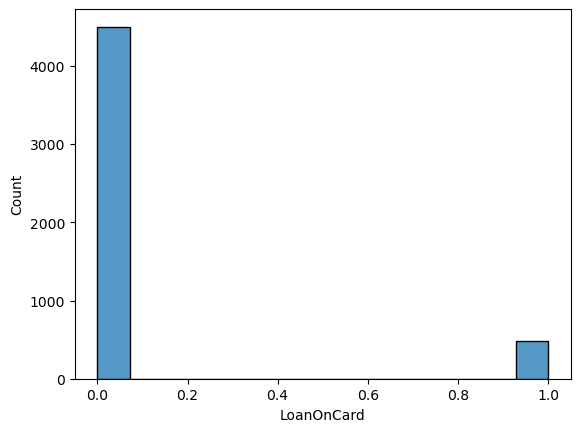

In [7]:
#Part B: Q2 A : Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.
sns.histplot(data,x= 'LoanOnCard')

In [8]:
data['LoanOnCard'].isnull().sum()

20

In [9]:
print(data['LoanOnCard'].value_counts())
print(data['LoanOnCard'].value_counts(normalize= True))

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64
0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64


<Axes: xlabel='LoanOnCard', ylabel='count'>

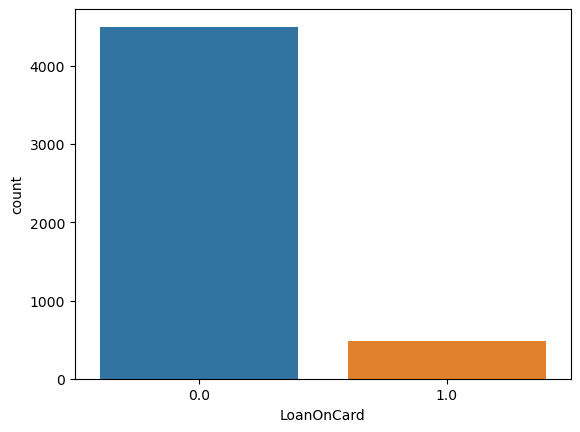

In [10]:
#plotting a count plot to show the target variable 'LoanOncard'.
sns.countplot(data,x= 'LoanOnCard')  

##### The values in the target columns are: 0, 1 & few missing values

It shows that target variable is highly imbalanced and hence is highly skewed

There are 20 missing values that contributes 0.4% of the target column.

Maximum values are 0 which counts 4500 and are 90% of the target column.

9.6% of the target column (480 observations) has value as 1.

In [11]:
#Part B: Q2 B : Check the percentage of missing values and impute if required.
data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

Only the target variable 'LoanOncard' is having 20 missing values that contributes around 0.4%.
Lets dig in to see the observations where we have missing values

In [12]:
data[data['LoanOnCard'].isna()]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,NaN


In [13]:
data.nunique()

ID                     5000
Age                      45
CustomerSince            47
HighestSpend            162
ZipCode                 467
HiddenScore               4
MonthlyAverageSpend     108
Level                     3
Mortgage                347
Security                  2
FixedDepositAccount       2
InternetBanking           2
CreditCard                2
LoanOnCard                2
dtype: int64

In [14]:
data[data['MonthlyAverageSpend']<3]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [15]:
data[data['HighestSpend']<100]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


##### Tried to find if there is any pattern in the missing value but couldn't find any. 
As the missing values are in target variable only, its not good to impute them. Also, its just account 0.4% , hence deleting these rows will be the best approach here.

In [16]:
#dropping the rows with missing values
data = data.dropna(axis=0)
data.shape

(4980, 14)

In [17]:
#Part B: Q2 C : Check for unexpected values in each categorical variable and impute with best suitable value.
columns=data.select_dtypes(include=["object","category"]).columns.tolist()
data[columns].nunique()

HiddenScore            4
Level                  3
Security               2
FixedDepositAccount    2
InternetBanking        2
CreditCard             2
dtype: int64

In [18]:
for i in data[columns]:
    print(data[i].value_counts())

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64
1    2089
3    1496
2    1395
Name: Level, dtype: int64
0    4460
1     520
Name: Security, dtype: int64
0    4678
1     302
Name: FixedDepositAccount, dtype: int64
1    2974
0    2006
Name: InternetBanking, dtype: int64
0    3514
1    1466
Name: CreditCard, dtype: int64


There are 6 categorical columns & I don't see any unexpected value in the categorical columns.

#### 3. Data Preparation and model building: [10 Marks]

A. Split data into X and Y. [1 Marks]

    [Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]

C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]

D. Print evaluation metrics for the model and clearly share insights. [1 Marks]

E. Balance the data using the right balancing technique. [2 Marks]

    i. Check distribution of the target variable

    ii. Say output is class A : 20% and class B : 80%

    iii. Here you need to balance the target variable as 50:50.

    iv. Try appropriate method to achieve the same.

F. Again train the same previous model on balanced data. [1 Marks]

G. Print evaluation metrics and clearly share differences observed. [2 Marks]

In [19]:
#Part B: Q3 A : Split data into X and Y.
X = data.drop (['ID' , 'ZipCode', 'LoanOnCard'],axis=1)
Y= data['LoanOnCard']
print(X.shape)
print(Y.shape)

(4980, 11)
(4980,)


In [20]:
#Part B: Q3 B : Split data into train and test. Keep 25% data reserved for testing.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)

(3735, 11)
(1245, 11)


In [21]:
#Part B: Q3 C : Train a Supervised Learning Classification base model - Logistic Regression.
log_model = LogisticRegression(solver="liblinear")
log_model.fit(X_train, Y_train)
Y_hat_log= log_model.predict(X_train)
Y_pred_log = log_model.predict(X_test)

In [22]:
#Part B: Q3 D : Print evaluation metrics for the model and clearly share insights. 
print('The accuracy of training set', accuracy_score(Y_train,Y_hat_log))
print('The accuracy of testing set', accuracy_score(Y_test,Y_pred_log))

The accuracy of training set 0.9507362784471218
The accuracy of testing set 0.9477911646586346


<Axes: >

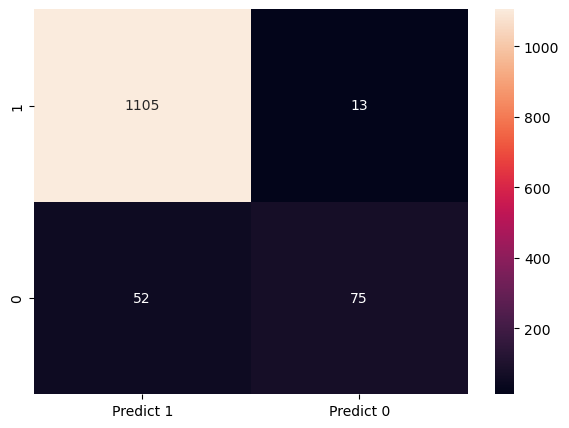

In [23]:
cm=confusion_matrix(Y_test,Y_pred_log)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [24]:
print(classification_report(Y_test,Y_pred_log))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1118
         1.0       0.85      0.59      0.70       127

    accuracy                           0.95      1245
   macro avg       0.90      0.79      0.83      1245
weighted avg       0.94      0.95      0.94      1245



#### Evaluation Metrics for Logistic Regression base model:

Accuracy of training set: 0.95 \
Accuracy of testing set: 0.95 \
Precision: 0.90 \
Recall: 0.79 \
F1 score: 0.83

Overall, model is quite simple and has a decent accuracy in both training & testing data. Precision is much better than Recall.

In [25]:
#Part B: Q3 E : Balance the data using the right balancing technique. 
Y.value_counts(normalize=True)

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64

The target variable highly imbalanced, value 0 being 90.4% & value 1 with jyts 9.6%.

In [26]:
'''Using SMOTE technique to upsample the imbalanced data rather than upsampling by copying minority class instances 
to avoid overfitting. SMOTE will add instances to dataset which are not exactly the copy of existing 
instances but are very similar to the original instances.'''

upsample = SMOTE(random_state=42)
X_upsampled, Y_upsampled = upsample.fit_resample(X, Y)
Y_upsampled.shape

(9000,)

In [27]:
Y_upsampled.value_counts()

1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64

In [28]:
#Part B: Q3 F : Again train the same previous model on balanced data. 
#split the upsampled data 
X_upsampled_train,X_upsampled_test,Y_upsampled_train,Y_upsampled_test = train_test_split(X_upsampled,Y_upsampled,test_size=0.25, random_state=1)
print(X_upsampled_train.shape)
print(X_upsampled_test.shape)

(6750, 11)
(2250, 11)


In [29]:
#Train the upsampled data with Logistic Regression
log_model_upsampled = LogisticRegression(solver="liblinear")
log_model_upsampled.fit(X_upsampled_train, Y_upsampled_train)
Y_hat_log_upsampled= log_model_upsampled.predict(X_upsampled_train)
Y_pred_log_upsampled = log_model_upsampled.predict(X_upsampled_test)

In [30]:
#Part B: Q3 G : Print evaluation metrics and clearly share differences observed.
print('The accuracy of training set', accuracy_score(Y_upsampled_train,Y_hat_log_upsampled))
print('The accuracy of testing set', accuracy_score(Y_upsampled_test,Y_pred_log_upsampled))

The accuracy of training set 0.9088888888888889
The accuracy of testing set 0.9071111111111111


<Axes: >

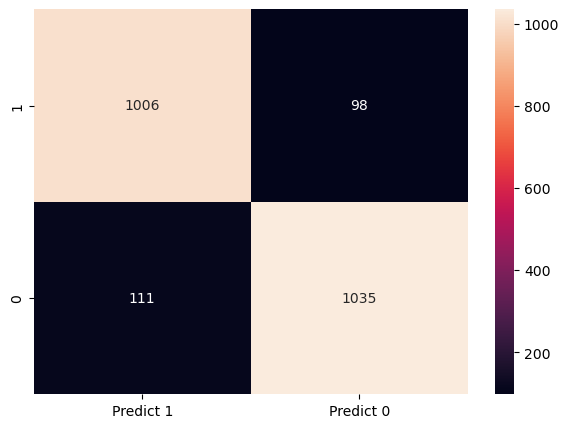

In [31]:
cm=confusion_matrix(Y_upsampled_test,Y_pred_log_upsampled)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [32]:
print(classification_report(Y_upsampled_test,Y_pred_log_upsampled))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      1104
         1.0       0.91      0.90      0.91      1146

    accuracy                           0.91      2250
   macro avg       0.91      0.91      0.91      2250
weighted avg       0.91      0.91      0.91      2250



###### Performance metrics of the model with upsampled data:

Accuracy of training set: 0.91, decreased by 4% 

Accuracy of testing set: 0.91, decreased by 4% 

Precision: 0.91, increased by 1% 

Recall: 0.91, increased by 12% 

F1 score: 0.91, increased by 8% 

Though the model accuracy on training data & testing data has decreased by 4% with respect to the Logistic regression base model but Precision, Recall & F1 score has improved alot. Hence, upsampling the data yielded better results.

#### 4. Performance Improvement: [10 Marks]

A. Train a base model each for SVM, KNN. [4 Marks]

B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]

    (Optional: Experiment with various Hyperparameters - Research required)

C. Print evaluation metrics for final model. [1 Marks]

D. Share improvement achieved from base model to final model. [2 Marks]

In [33]:
#Split data into train and test. Keep 25% data reserved for testing.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)

(3735, 11)
(1245, 11)


In [34]:
#Part B: Q4 A : Train a base model each for SVM, KNN.
#Training base model for SVM
SVM_model = svm.SVC(gamma=0.025, C=3) 
SVM_model.fit(X_train , Y_train)
Y_hat_SVM = SVM_model.predict(X_train)
Y_pred_SVM = SVM_model.predict(X_test)

In [35]:
#print accuracy of SVM model for both training & testing set
print('The accuracy of training set', accuracy_score(Y_train,Y_hat_SVM))
print('The accuracy of testing set', accuracy_score(Y_test,Y_pred_SVM))

The accuracy of training set 0.9908969210174029
The accuracy of testing set 0.9164658634538153


<Axes: >

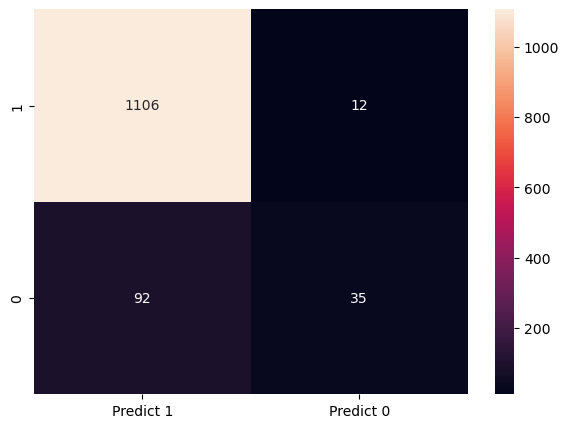

In [36]:
cm=confusion_matrix(Y_test,Y_pred_SVM)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [37]:
print(classification_report(Y_test,Y_pred_SVM))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      1118
         1.0       0.74      0.28      0.40       127

    accuracy                           0.92      1245
   macro avg       0.83      0.63      0.68      1245
weighted avg       0.90      0.92      0.90      1245



In [38]:
#Training base model for KNN
KNN_model = KNeighborsClassifier(n_neighbors= 5)
KNN_model.fit(X_train, Y_train) # fitting the model

Y_hat_KNN = KNN_model.predict(X_train)
Y_pred_KNN = KNN_model.predict(X_test) # predict the response


In [39]:
#print accuracy of KNN model for both training & testing set
print('The accuracy of training set', accuracy_score(Y_train,Y_hat_KNN))
print('The accuracy of testing set', accuracy_score(Y_test,Y_pred_KNN))

The accuracy of training set 0.9397590361445783
The accuracy of testing set 0.9012048192771084


<Axes: >

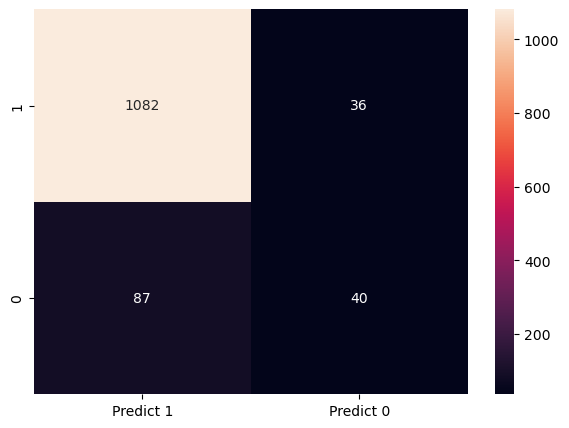

In [40]:
cm=confusion_matrix(Y_test,Y_pred_KNN)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [41]:
print(classification_report(Y_test,Y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1118
         1.0       0.53      0.31      0.39       127

    accuracy                           0.90      1245
   macro avg       0.73      0.64      0.67      1245
weighted avg       0.88      0.90      0.89      1245



In [42]:
#Part B: Q4 B : Tune parameters for each of the models wherever required and finalize a model.
#Tuning parameters for SVM: Changing the Gamma & C values in SVM model
SVM_model_tuned = svm.SVC(gamma=0.0025, C=1) 
SVM_model_tuned.fit(X_train , Y_train)
Y_hat_SVM_tuned = SVM_model_tuned.predict(X_train)
Y_pred_SVM_tuned = SVM_model_tuned.predict(X_test)

In [43]:
#print accuracy of SVM model for both training & testing set
print('The accuracy of training set', accuracy_score(Y_train,Y_hat_SVM_tuned))
print('The accuracy of testing set', accuracy_score(Y_test,Y_pred_SVM_tuned))

The accuracy of training set 0.9408299866131191
The accuracy of testing set 0.9052208835341365


<Axes: >

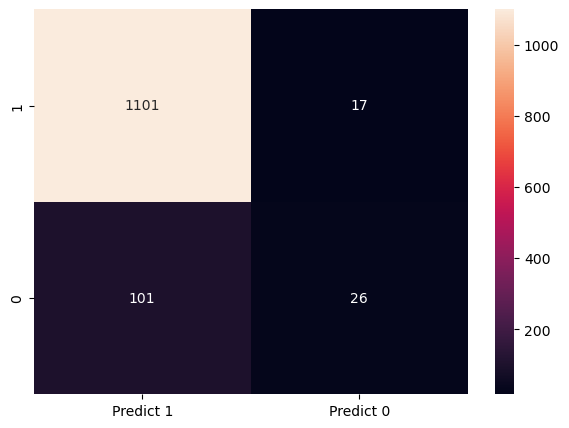

In [44]:
cm=confusion_matrix(Y_test,Y_pred_SVM_tuned)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [45]:
print(classification_report(Y_test,Y_pred_SVM_tuned))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1118
         1.0       0.60      0.20      0.31       127

    accuracy                           0.91      1245
   macro avg       0.76      0.59      0.63      1245
weighted avg       0.88      0.91      0.88      1245



In [46]:
#Trying few other value of Gamma & C values in SVM model
SVM_model_tuned1 = svm.SVC(gamma=2.5, C=5) 
SVM_model_tuned1.fit(X_train , Y_train)
Y_hat_SVM_tuned1 = SVM_model_tuned1.predict(X_train)
Y_pred_SVM_tuned1 = SVM_model_tuned1.predict(X_test)

In [47]:
#print accuracy of SVM model for both training & testing set
print('The accuracy of training set', accuracy_score(Y_train,Y_hat_SVM_tuned1))
print('The accuracy of testing set', accuracy_score(Y_test,Y_pred_SVM_tuned1))

The accuracy of training set 1.0
The accuracy of testing set 0.8979919678714859


<Axes: >

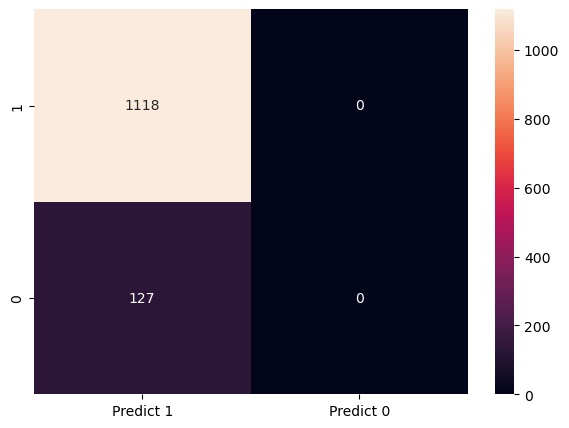

In [48]:
cm=confusion_matrix(Y_test,Y_pred_SVM_tuned1)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [49]:
print(classification_report(Y_test,Y_pred_SVM_tuned1))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1118
         1.0       0.00      0.00      0.00       127

    accuracy                           0.90      1245
   macro avg       0.45      0.50      0.47      1245
weighted avg       0.81      0.90      0.85      1245



In [50]:
#Hypertuning KNN model
#Finding the best k
accuracy_k = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat_knn= knn.predict(X_test)
    accuracy_k[i-1] = accuracy_score(Y_test, yhat_knn)

accuracy_k

array([0.90120482, 0.90923695, 0.89879518, 0.89959839, 0.90120482,
       0.90200803, 0.90441767, 0.90040161, 0.90361446, 0.90281124,
       0.90682731, 0.90441767, 0.89879518, 0.89959839, 0.89959839,
       0.89879518, 0.89558233, 0.89879518, 0.89799197, 0.89959839])

<Axes: xlabel='No. of Neighbors ', ylabel='Accuracy'>

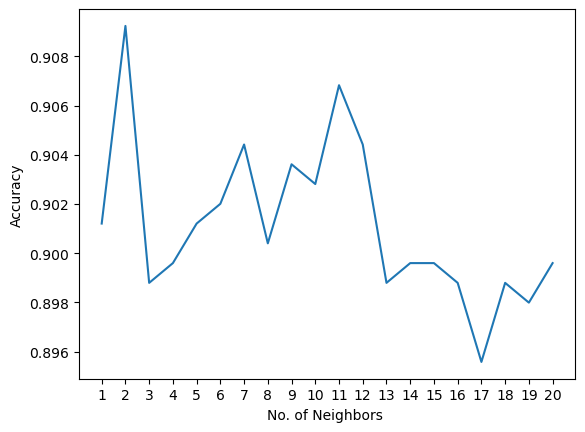

In [51]:
x_val = np.arange(1,21,step=1)
plt.xticks(x_val)
plt.xlabel('No. of Neighbors ')
plt.ylabel('Accuracy')
sns.lineplot(x= x_val, y= accuracy_k)

In [53]:
grid_params_1 = { 'n_neighbors' : [2,7,11],
               'weights' : ['distance','uniform'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs_1 = GridSearchCV(KNeighborsClassifier(), grid_params,cv=3)

In [55]:
# fit the model on our train set
g_res = gs_1.fit(X_train, Y_train)

In [56]:
#get the best score
g_res.best_score_

0.9255689424364123

In [57]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [60]:
# use the best hyperparameters
knn_tuned = KNeighborsClassifier(n_neighbors = 7, weights = 'distance',metric = 'manhattan')
knn_tuned.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [62]:
Y_hat_KNN_tuned = knn_tuned.predict(X_train)
Y_pred_KNN_tuned = knn_tuned.predict(X_test)

In [63]:
#print accuracy of KNN model for both training & testing set
print('The accuracy of training set', accuracy_score(Y_train,Y_hat_KNN_tuned))
print('The accuracy of testing set', accuracy_score(Y_test,Y_pred_KNN_tuned))

The accuracy of training set 1.0
The accuracy of testing set 0.9172690763052209


<Axes: >

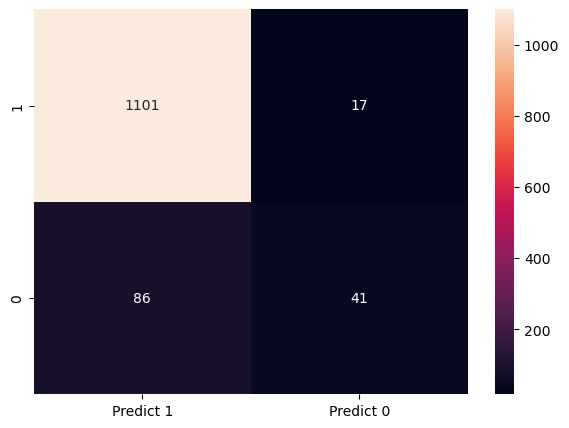

In [64]:
cm=confusion_matrix(Y_test,Y_pred_KNN_tuned)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [65]:
print(classification_report(Y_test,Y_pred_KNN_tuned))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1118
         1.0       0.71      0.32      0.44       127

    accuracy                           0.92      1245
   macro avg       0.82      0.65      0.70      1245
weighted avg       0.91      0.92      0.90      1245



#### Part B: Q4 C : Print evaluation metrics for final model.
##### SVM tuned model1:
Accuracy of trained data: 0.94 

Accuracy of test data: 0.91 

Precision: 0.76

Recall: 0.59 

F1 score: 0.63 

##### SVM tuned model2:
Accuracy of trained data: 1.00 

Accuracy of test data: 0.90 

Precision: 0.45  

Recall: 0.50  

F1 score: 0.47 

##### KNN tuned model:
Accuracy of trained data: 1.00 

Accuracy of test data: 0.92 

Precision: 0.82 

Recall: 0.65 

F1 score: 0.70  

##### Final Model is the KNN tuned model where the model performance is much better compared to other tuned model. We can notice better Recall, Precision & F1 score.

#### Part B: Q4 D : Share improvement achieved from base model to final model.

KNN final model performance compared to KNN Base model:

Accuracy of trained data: 1.00 (Increased by 6%)

Accuracy of test data: 0.92 (Increased by 2%)

Precision: 0.82 (Increased by 9%)

Recall: 0.65 (Increased by 1%)

F1 score: 0.70 (Increased by 3%)